<a href="https://colab.research.google.com/github/Evandro72/NGram/blob/main/NGram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 5.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=cd294eaf0be535af1328ff75d2d6a8e5fa57223fc78f9f153fa4df54a041483f
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [3]:
pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=5938eb1ee6e8cc6be8a1f5c0428fd36bb2abb41769747b6ac248a3e71911fffe
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [5]:
pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 830 kB 5.1 MB/s 
     |████████████████████████████████| 281 kB 62.7 MB/s 
     |████████████████████████████████| 1.6 MB 46.2 MB/s 
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16322 sha256=86a6b69991b81c6ff1e74ec02a3e500f07e74561b12aab36d6302c370ce049b0
  Stored in directory: /root/.cache/pip/wheels/29/a7/0e/3a8f17ac69d759e1e93647114bc9bdc95957e5b0cbfd405205
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [6]:
from PIL import Image
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from langdetect import detect
import random
import pycountry
import swifter

In [7]:
# Reading CSV File
df = pd.read_csv('Tweets.csv')

In [8]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

def get_ngrams(text, n=2):
    text = str(text)
    n_grams = ngrams(text.split(), n)
    returnVal = []
    
    try:
        for grams in n_grams:
            returnVal.append('_'.join(grams))
    except(RuntimeError):
        pass
        
    return ' '.join(returnVal).strip()

In [9]:
# Replacing Text
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('UmbriaJazzOFC','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('umbriajazz','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('Umbria Jazz','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('jazz','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('Umbria','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('musica','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('perugia','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('Santa Giuliana','')

In [10]:
# Bigram
df['bigram_text'] = df['Cleaned_Tweet'].swifter.apply(get_ngrams, n=2)
df['bigram_text']

Pandas Apply:   0%|          | 0/25055 [00:00<?, ?it/s]

0        About_last last_night night_ujweekend ujweeken...
1        A_Perugia Perugia_c c_Rotatoria Rotatoria_Mile...
2        Come_vedete vedete_Terni Terni_fa fa_sempre se...
3        Terni_chiude chiude_grande grande_lexploit lex...
4        Terni_chiude chiude_grande grande_lexploit lex...
                               ...                        
25050                     hodio_hodio hodio_rei rei_gelato
25051    ninnar_meraviglia meraviglia_grazie grazie_Spe...
25052    grazie_abiodun abiodun_trovano trovano_program...
25053                                    si_gode gode_2007
25054    termina_post post_onemobile onemobile_sull sul...
Name: bigram_text, Length: 25055, dtype: object

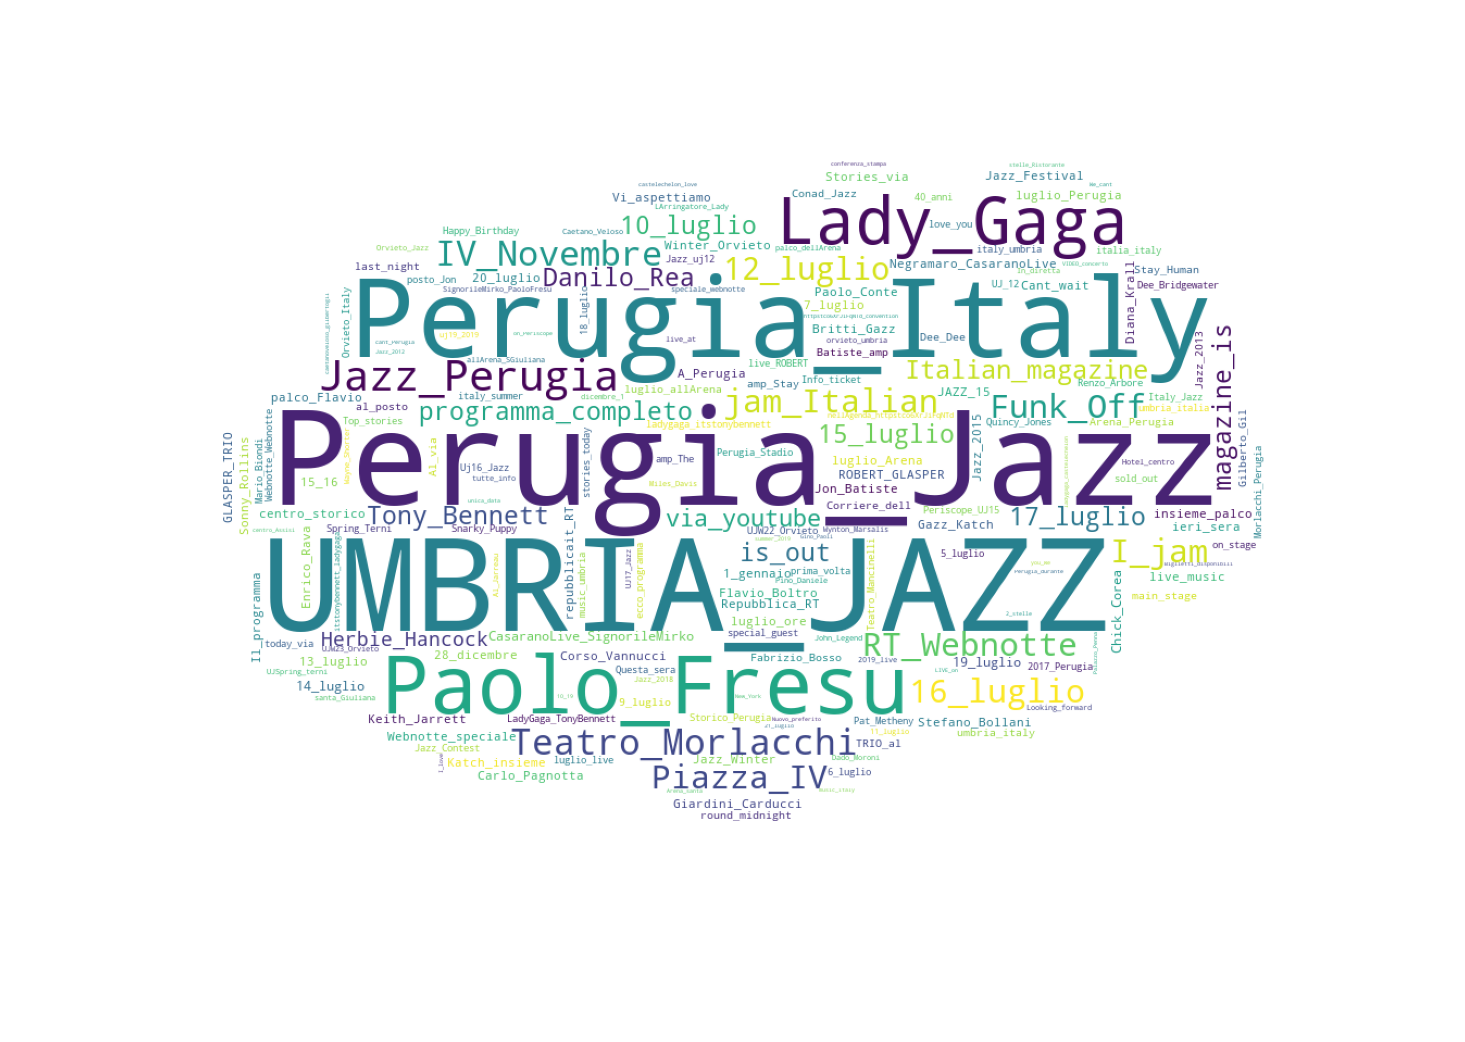

In [12]:
# for the wordcloud
mask = np.array(Image.open('cloud.png'))

wordcloud = WordCloud(
                width = 2000, 
                height = 1334, 
                random_state=1, 
                background_color='white',                 
                max_words = 200,
                mask=mask,
                collocations=False, 
                normalize_plurals=False
            ).generate(' '.join(df['bigram_text'].tolist()))

fig = plt.figure(figsize=(25, 17), dpi=80)
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.axis("off")
plt.box(False)
plt.show()
plt.close() 